In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse

In [2]:
df = pd.read_csv("../input/train.csv")
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


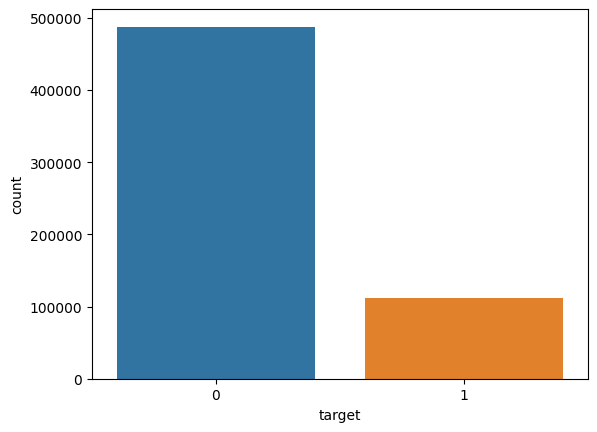

In [3]:
b = sns.countplot(x="target",data=df)
plt.show()

In [4]:
from sklearn import preprocessing


df.loc[:, "ord_2"] = df["ord_2"].fillna("NONE")
lbl_enc = preprocessing.LabelEncoder()
df.loc[:,"ord_2"] = lbl_enc.fit_transform(df["ord_2"].values)

In [5]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,3,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,6,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,2,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,4,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,1,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,2,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,0,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,2,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,6,m,X,Ey,1.0,5.0,0


In [10]:
example = np.array(
    [
        [0,0,1],
        [1,0,0],
        [1,0,1],
    ]
)

print(example.nbytes)

sparse_example = sparse.csr_matrix(example)

print(sparse_example.data.nbytes)
print(sparse_example.data.nbytes+sparse_example.indptr.nbytes+sparse_example.indices.nbytes)

72
32
64


In [19]:
example = np.random.randint(1000,size=100000)
print(example.nbytes)

ohe = preprocessing.OneHotEncoder(sparse=False)

ohe_example = ohe.fit_transform(example.reshape(-1,1))
print(ohe_example.nbytes)

ohe = preprocessing.OneHotEncoder(sparse=True)

ohe_example = ohe.fit_transform(example.reshape(-1,1))
print(ohe_example.data.nbytes)

800000
800000000
800000


In [20]:
df.groupby("ord_2")["id"].count()

ord_2
0     84790
1     97822
2    142726
3     67508
4     64840
5     18075
6    124239
Name: id, dtype: int64

In [21]:
df.groupby(["ord_1","ord_2"])["id"].count()

ord_1        ord_2
Contributor  0        15634
             1        17734
             2        26082
             3        12428
             4        11919
             5         3250
             6        22774
Expert       0        19477
             1        22956
             2        33249
             3        15792
             4        15078
             5         4225
             6        28900
Grandmaster  0        13623
             1        15464
             2        22818
             3        10805
             4        10363
             5         2894
             6        19899
Master       0        10800
             1        12364
             2        18035
             3         8594
             4         8209
             5         2262
             6        15734
Novice       0        22718
             1        26271
             2        38233
             3        17850
             4        17373
             5         4889
             6        33263
N